In [1]:
from matplotlib import animation
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn import decomposition
from tqdm.notebook import tqdm

# plt.rcParams.update({"font.size": 16})
# %config InlineBackend.figure_format="retina"

  0%|          | 0/4 [00:00<?, ?it/s]

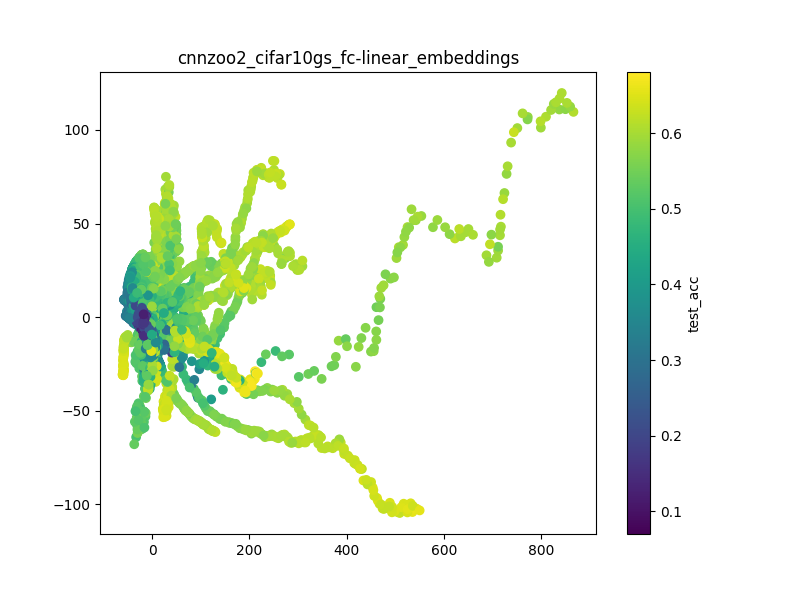

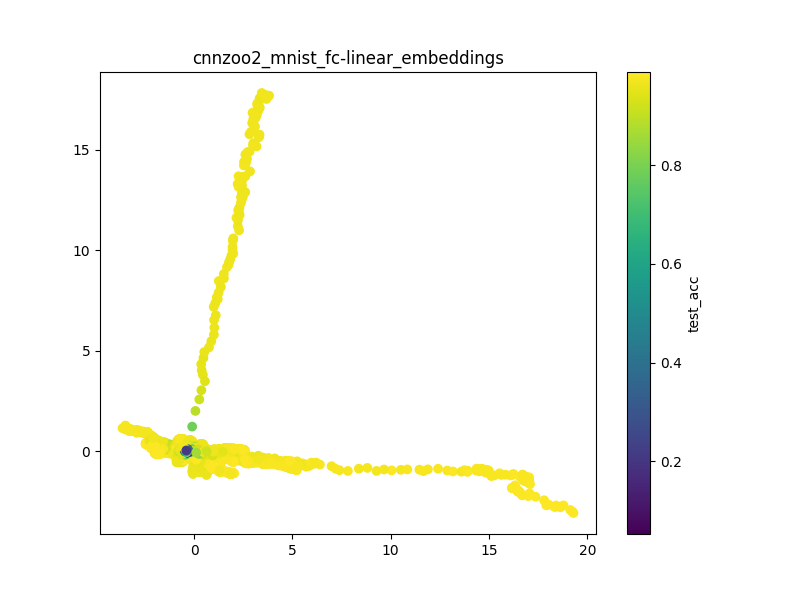

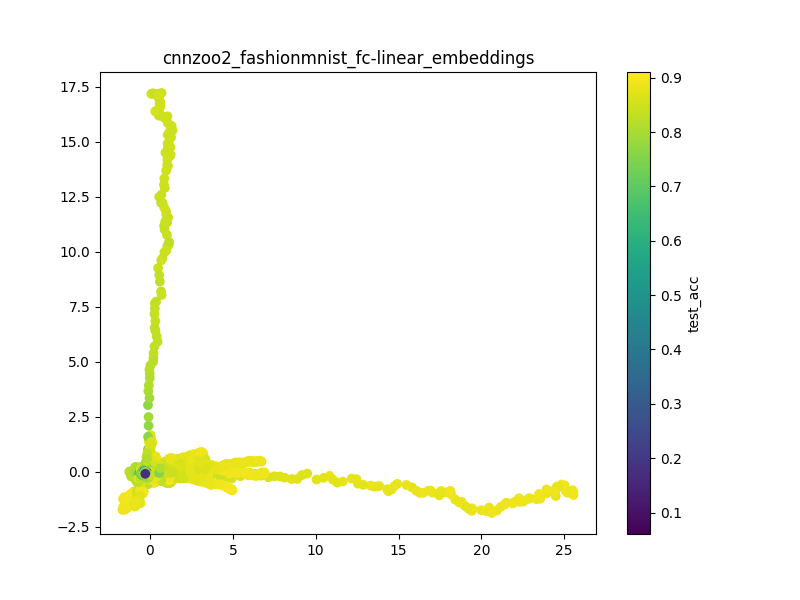

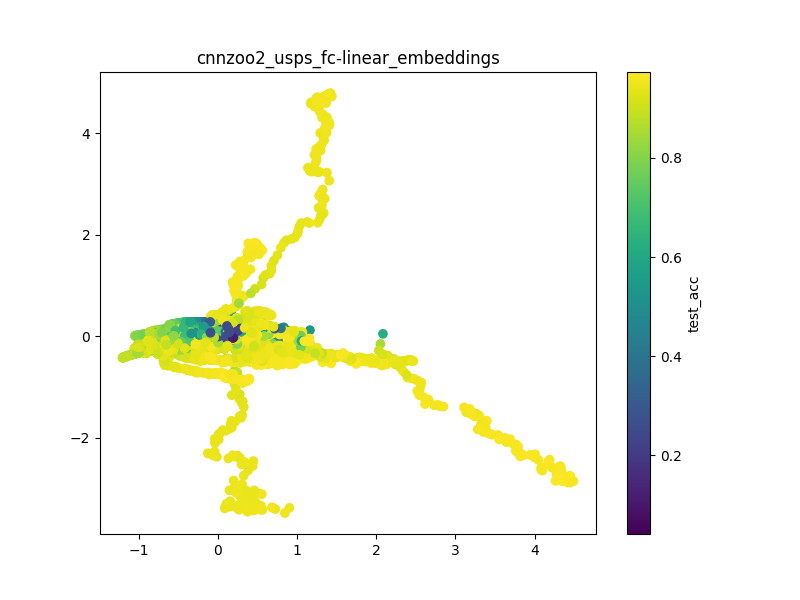

In [6]:
%matplotlib widget
dataset_names = ["cifar10gs", "mnist", "fashionmnist", "usps"]

for dataset_name in tqdm(dataset_names):
    # for model_type in ["linear", "conv"]:
    for model_type in ["fc-linear"]:
        # embedding_file = f"cnnzoo2_{dataset_name}_comvex-{model_type}_embeddings"
        embedding_file = f"cnnzoo2_{dataset_name}_{model_type}_embeddings"
        data = torch.load("embeddings/" + embedding_file + ".pt")
        X = data["embeddings"].numpy()
        y = data["true_acc"].numpy()
        y_pred = data["pred_acc"].numpy()

        pca = decomposition.PCA(n_components=2)
        pca.fit(X)
        X_ = pca.transform(X)

        # fig, ax = plt.subplots(figsize=(12, 8))
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(X_[:, 0], X_[:, 1], c=y, cmap="viridis")
        cbar = plt.colorbar()
        cbar.set_label("test_acc")
        plt.title(embedding_file)
        plt.savefig(
            "figures/" + embedding_file + ".png",
            dpi=500,
            bbox_inches="tight",
            transparent=True,
        )

#         pca = decomposition.PCA(n_components=3)
#         pca.fit(X)
#         X_ = pca.transform(X)

#         fig = plt.figure(1)  # , figsize=(12, 8)
#         plt.clf()
#         ax = fig.add_subplot(111, projection="3d") # , elev=48, azim=134

#         def rotate(angle):
#             ax.view_init(elev=20, azim=angle)

#         p = ax.scatter(X_[:, 0], X_[:, 1], X_[:, 2], c=y[:], cmap="viridis")
#         # ax.view_init(elev=-120, azim=20)
#         fig.colorbar(p)
#         plt.title(embedding_file)

#         rotation_animation = animation.FuncAnimation(
#             fig, rotate, frames=np.arange(0, 365, 5), interval=100
#         )
#         rotation_animation.save(
#             "figures/" + embedding_file + ".gif", dpi=100, writer="pillow"
#         )

In [ ]:
embedding_file = "cnnzoo2_cifar10gs_comvex-conv_embeddings"
data = torch.load("embeddings/" + embedding_file + ".pt")
X = data["embeddings"].detach().numpy()
y = data["true_acc"].numpy()
y_pred = data["pred_acc"].detach().numpy()

In [ ]:
%matplotlib widget
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_ = pca.transform(X)

fig = plt.figure(1)  # , figsize=(12, 8)
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)


def rotate(angle):
    ax.view_init(elev=20, azim=angle)


p = ax.scatter(X_[:, 0], X_[:, 1], X_[:, 2], c=y[:], cmap="viridis")
# ax.view_init(elev=-120, azim=20)
fig.colorbar(p)
plt.title(embedding_file)

rotation_animation = animation.FuncAnimation(
    fig, rotate, frames=np.arange(0, 365, 5), interval=100
)
rotation_animation.save("figures/" + embedding_file + ".gif", dpi=100, writer="pillow")
# plt.show()